In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [2]:
news_tables = {}
stocks = ['FB','AMZN','AAPL','TSLA','GOOG']

for stock in stocks:
    url = finwiz_url + stock
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[stock] = news_table

In [3]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AAPL']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
aapl_tr = amzn.findAll('tr')

aapl_tr

[<tr><td align="right" style="white-space:nowrap" width="130">Apr-10-21 10:14PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investors.com/market-trend/stock-market-today/dow-jones-futures-stock-market-rally-hot-watch-this-square-jpmorgan-apple-supplier-near-buy-points/?src=A00220" target="_blank">Dow Jones Futures: The New Stock Market Rally Risk; Square, Apple Supplier Near Buy Points</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Investor's Business Daily</span></div></div></td></tr>,
 <tr><td align="right" width="130">12:05PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/benzingas-bulls-bears-week-apple-160530743.html" target="_blank">Benzinga's Bulls And Bears Of The Week: Apple, Chevron, GM, GE, Peloton And More</a></div><div class="news-link-right"><span style="color

In [5]:
for i, table_row in enumerate(aapl_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 10 rows of data
    if i == 9:
        break

Dow Jones Futures: The New Stock Market Rally Risk; Square, Apple Supplier Near Buy Points
Apr-10-21 10:14PM  
Benzinga's Bulls And Bears Of The Week: Apple, Chevron, GM, GE, Peloton And More
12:05PM  
Who Will Be Apple's Next CEO?
12:00PM  
10 Best Tech Stocks to Buy According to Billionaire Ken Griffin
10:46AM  
Top 10 S&P 500 Stocks by Index Weight
Apr-09-21 11:20PM  
Aramco Selling $12.4 Billion Stake in Pipeline Rights Unit
06:45PM  
The Economy Is On a Roll. Now Is the Time to Bet on These Hardware Stocks.
06:14PM  
UPDATE 1-U.S. senators criticize Apple for not testifying on antitrust concerns
04:47PM  
Apple iPhone 12 Sales Seen Getting Lift From Tax Refunds, Stimulus Checks
04:25PM  
4 Dow Jones Stocks To Buy And Watch In April 2021: Apple Jumps, Boeing Slides
04:07PM  


In [6]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the stock from the file name, get the string up to the 1st '_'  
        stock = file_name.split('_')[0]
        
        # Append stock, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([stock, date, time, text])
        
parsed_news

[['FB',
  'Apr-10-21',
  '10:58AM',
  'Saverins B Capital, Others Invest $1 Billion in Indias Byjus'],
 ['FB',
  'Apr-10-21',
  '09:08AM',
  'Why Snap Inc. Shares Could Leave Investors Ghosted'],
 ['FB', 'Apr-09-21', '11:20PM', 'Top 10 S&P 500 Stocks by Index Weight'],
 ['FB', 'Apr-09-21', '08:04PM', 'Facebook: The Classic Toll Bridge'],
 ['FB',
  'Apr-09-21',
  '06:50PM',
  'These Are The 5 Best Stocks To Buy And Watch Now'],
 ['FB',
  'Apr-09-21',
  '04:47PM',
  'Facebook algorithm shows its users different job ads based on gender, study finds'],
 ['FB',
  'Apr-09-21',
  '11:45AM',
  'Facebook Converts Part Of Menlo Park Headquarters To Vaccination Site: Report'],
 ['FB',
  'Apr-09-21',
  '11:40AM',
  "Facebook Removes 16K Accounts For Fake Review Trading After UK CMA's Second Intervention: Report"],
 ['FB',
  'Apr-09-21',
  '11:10AM',
  'Patreon CEO breaks down the future of the creator economy'],
 ['FB',
  'Apr-09-21',
  '10:09AM',
  'Facebook to turn Menlo Park headquarters into v

In [7]:
import nltk
nltk.download('vader_lexicon')

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['stock', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\appus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,stock,date,time,headline,neg,neu,pos,compound
0,FB,2021-04-10,10:58AM,"Saverins B Capital, Others Invest $1 Billion i...",0.000,1.000,0.000,0.0000
1,FB,2021-04-10,09:08AM,Why Snap Inc. Shares Could Leave Investors Gho...,0.128,0.638,0.234,0.2500
2,FB,2021-04-09,11:20PM,Top 10 S&P 500 Stocks by Index Weight,0.000,0.795,0.205,0.2023
3,FB,2021-04-09,08:04PM,Facebook: The Classic Toll Bridge,0.000,1.000,0.000,0.0000
4,FB,2021-04-09,06:50PM,These Are The 5 Best Stocks To Buy And Watch Now,0.000,0.682,0.318,0.6369


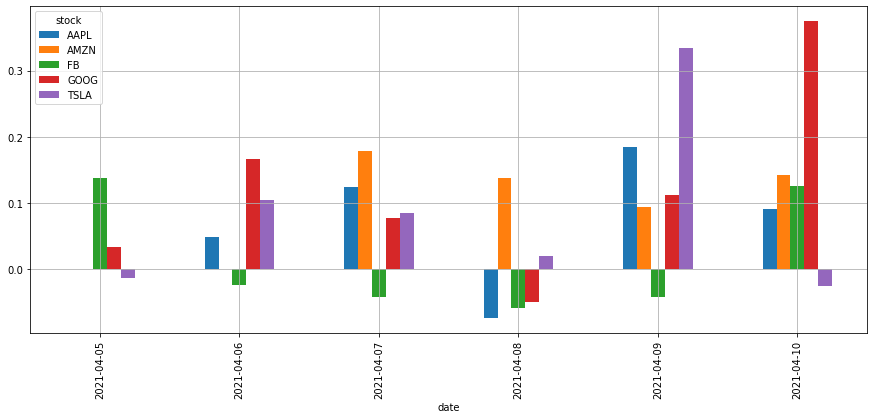

In [9]:
plt.rcParams['figure.figsize'] = [15, 6]

# Group by date and stock columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['stock','date']).mean()

# Unstack the column stock
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()